# House Prices In India

This data set was taken from: https://www.kaggle.com/anmolkumar/house-price-prediction-challenge

Features Columns:

POSTED_BY -	Category marking who has listed the property

UNDER_CONSTRUCTION - Under Construction or Not

RERA - Rera approved or Not

BHK_NO - Number of Rooms

BHK_OR_RK - Type of property

SQUARE_FT - Total area of the house in square feet 

READYTOMOVE - Category marking Ready to move or Not

RESALE - Category marking Resale or not

ADDRESS - Address of the property

LONGITUDE - Longitude of the property

LATITUDE - Latitude of the property

TARGET(PRICE_IN_LACS) - The price of the property

In total we have 12 features

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head(12)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


# Feature Engeneering

Here we will study the features and its importance to the prediction of the house price.

1) Null Values

In [4]:
train_data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [5]:
test_data.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

2) Price Outliers

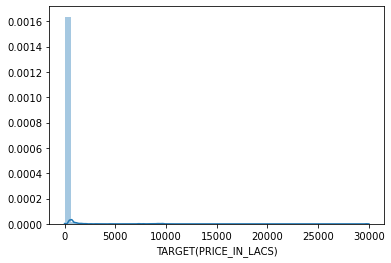

In [6]:
sns.distplot(train_data['TARGET(PRICE_IN_LACS)'])

We can see outliers from 4000 to higher prices since we do not have much data on that so we can clean them.
Lets start to clear 5% of the higher values of the price.

In [7]:
train_data['TARGET(PRICE_IN_LACS)'].value_counts()

110.0     795
100.0     770
120.0     652
130.0     598
45.0      583
         ... 
96.6        1
95.6        1
8660.0      1
94.3        1
78.2        1
Name: TARGET(PRICE_IN_LACS), Length: 1172, dtype: int64

In [8]:
len(train_data)*(0.03)

883.53

In [9]:
# Remove the price outliers
train_data = train_data.sort_values('TARGET(PRICE_IN_LACS)',ascending=False).iloc[884:] 
train_data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,28567.000000,28567.000000,28567.000000,2.856700e+04,28567.000000,28567.000000,28567.000000,28567.000000,28567.000000
mean,0.179298,0.315924,2.353450,1.542744e+03,0.820702,0.933875,21.348115,76.926668,81.959182
std,0.383608,0.464891,0.825286,2.666530e+04,0.383608,0.248505,6.240020,10.457439,69.031482
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,8.908686e+02,1.000000,1.000000,18.438476,73.847780,37.000000
50%,0.000000,0.000000,2.000000,1.156154e+03,1.000000,1.000000,21.071623,77.338956,60.000000
75%,0.000000,1.000000,3.000000,1.505131e+03,1.000000,1.000000,26.900926,78.020000,100.000000
max,1.000000,1.000000,20.000000,4.300000e+06,1.000000,1.000000,59.912884,152.962676,420.000000


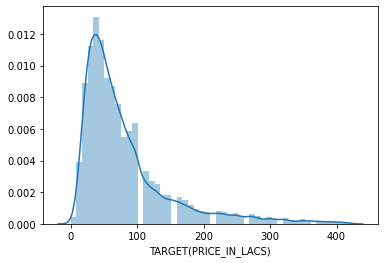

In [10]:
sns.distplot(train_data['TARGET(PRICE_IN_LACS)'])

Now we obtained a distribution plot with the most comun prices we have, so we cleaned the price outliers.

3) Latitude and Longitude

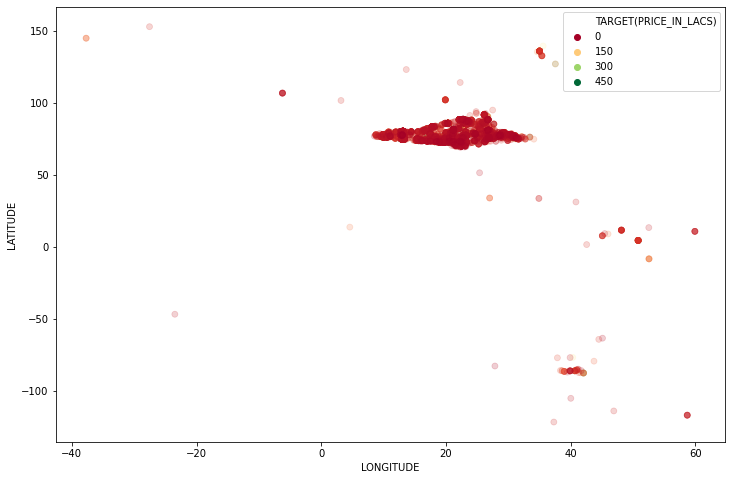

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='LONGITUDE',y='LATITUDE',data=train_data,hue='TARGET(PRICE_IN_LACS)', 
                palette = 'RdYlGn', edgecolor = None, alpha = 0.2)

Here we can see the scatter of longitude and latitude and see the areas with more houses to sell along with the most expensive ones. Hilighting the importance of this data to the model. Now we can discard the address since we have the latitude and longitude, avoiding overfitting.

4) Square_Ft

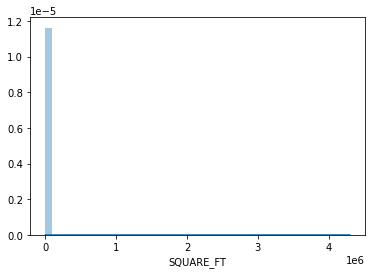

In [12]:
sns.distplot(train_data['SQUARE_FT'])

So we need to clean also some outliers from the square feat feature.

In [13]:
train_data['SQUARE_FT'].value_counts()

1000.000000    477
1250.000000    291
800.000000     202
1200.000000    178
1600.000000    120
              ... 
1093.084800      1
1358.152912      1
1745.004222      1
760.135135       1
1309.037901      1
Name: SQUARE_FT, Length: 18896, dtype: int64

In [14]:
len(train_data)*(0.03)

857.01

In [15]:
# Cleaning the sqaure_ft outliers
train_data = train_data.sort_values('SQUARE_FT',ascending=False).iloc[852:]
train_data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,27715.000000,27715.000000,27715.000000,27715.000000,27715.000000,27715.000000,27715.000000,27715.000000,27715.000000
mean,0.180263,0.315136,2.304673,1197.120600,0.819737,0.934187,21.309430,76.924631,77.612777
std,0.384414,0.464578,0.749139,465.185990,0.384414,0.247959,6.208328,10.452539,62.884893
min,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,876.111989,1.000000,1.000000,18.441921,73.823649,36.000000
50%,0.000000,0.000000,2.000000,1149.131767,1.000000,1.000000,21.000000,77.338956,59.000000
75%,0.000000,1.000000,3.000000,1470.155837,1.000000,1.000000,26.900926,78.067294,95.000000
max,1.000000,1.000000,20.000000,2713.090662,1.000000,1.000000,59.912884,152.962676,420.000000


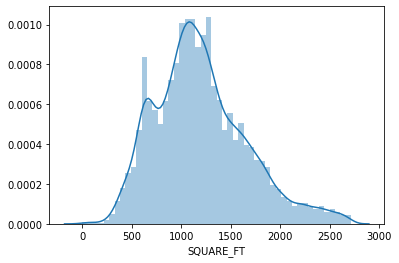

In [16]:
sns.distplot(train_data['SQUARE_FT'])

Now we cleaned the feature 'SQUARE_FT', eliminating the outliers.

5) BHK or RK

In [17]:
train_data['BHK_OR_RK'].value_counts()

BHK    27691
RK        24
Name: BHK_OR_RK, dtype: int64

In [18]:
# Turning into a binary variable
train_data['BHK_OR_RK'] = train_data['BHK_OR_RK'].replace(to_replace=['BHK', 'RK'], value=[1, 0])   

In [19]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
20752,Dealer,1,1,3,1,2713.090662,0,1,"ITPL,Bangalore",12.985786,77.735560,240.0
6550,Dealer,1,1,4,1,2710.027100,0,1,"Konanakunte,Bangalore",12.885500,77.563800,240.0
5283,Dealer,1,1,4,1,2710.027100,0,1,"Konanakunte,Bangalore",12.885500,77.563800,230.0
6127,Dealer,1,1,4,1,2710.027100,0,1,"Konanakunte,Bangalore",12.885500,77.563800,250.0
7793,Dealer,0,0,3,1,2710.027100,1,1,"Whitefield,Bangalore",12.995893,77.761394,220.0


Now we convert the 'BHK_OR_RK' feature to 0 and 1 to be easy to analyse.

6) Conversion of the 'Posted By' to numerical feature

In [20]:
train_data['POSTED_BY'] = train_data['POSTED_BY'].replace(to_replace=['Owner', 'Dealer','Builder'], value=[0, 1, 2]) 
test_data['POSTED_BY'] = test_data['POSTED_BY'].replace(to_replace=['Owner', 'Dealer','Builder'], value=[0, 1, 2])   

7) Data Correlation

In [21]:
train_data.corr()['TARGET(PRICE_IN_LACS)']

POSTED_BY                0.276151
UNDER_CONSTRUCTION       0.038658
RERA                     0.140437
BHK_NO.                  0.353992
BHK_OR_RK                0.017123
SQUARE_FT                0.423503
READY_TO_MOVE           -0.038658
RESALE                  -0.007220
LONGITUDE               -0.119931
LATITUDE                -0.073472
TARGET(PRICE_IN_LACS)    1.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

With the correlation we see that the price is related more with the Resale, Number of rooms, square feat, posted by. Lets see the all picture of all the features using sns heatmap.

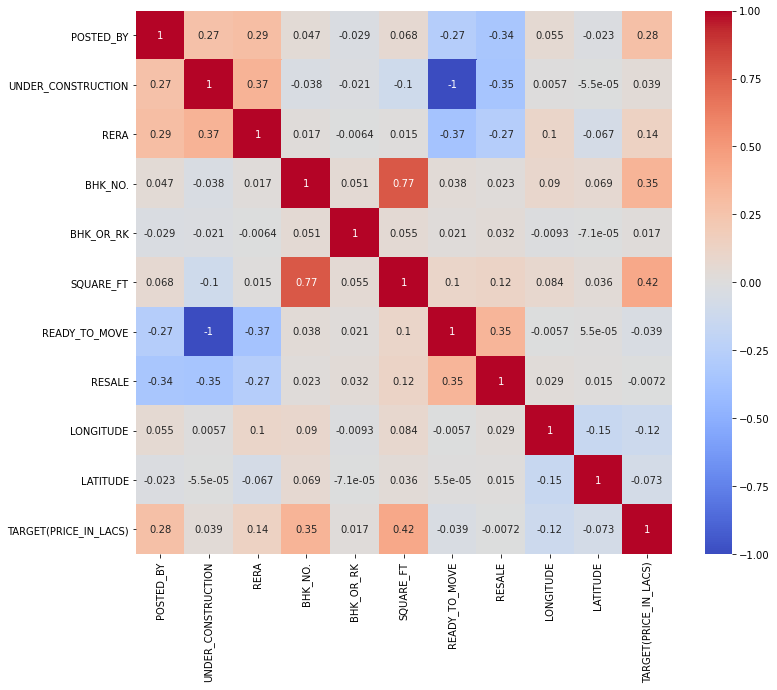

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

According to the heatmap the 'Ready_to_move' feature is 100% related with the 'Under_construction' feature, so we need to remove one to avoid overfitting.

# Processing the Data

Based on the conclusions we obtained in the previous section we will drop some disposable features and features that my cause overfiting.

1) we conluded that the address is disposable since we have the latitude and longitude, so lets drop if from both datasets

In [23]:
train_data.drop(['ADDRESS'], axis = 1, inplace = True)
test_data.drop(['ADDRESS'], axis = 1, inplace = True)

2) We easely see that the feature BHK_OR_RK is unbalanced and has less correlation with the price so we can drop it

In [24]:
train_data.drop(['BHK_OR_RK'], axis = 1, inplace = True)
test_data.drop(['BHK_OR_RK'], axis = 1, inplace = True)

3) As mentioned in the previous section 'Ready to move' feature is 100% correlated with the 'under construction' feature so to avoid overfitting we drop one of them.

In [25]:
train_data.drop(['READY_TO_MOVE'], axis = 1, inplace = True)
test_data.drop(['READY_TO_MOVE'], axis = 1, inplace = True)

In [26]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
20752,1,1,1,3,2713.090662,1,12.985786,77.735560,240.0
6550,1,1,1,4,2710.027100,1,12.885500,77.563800,240.0
5283,1,1,1,4,2710.027100,1,12.885500,77.563800,230.0
6127,1,1,1,4,2710.027100,1,12.885500,77.563800,250.0
7793,1,0,0,3,2710.027100,1,12.995893,77.761394,220.0


# Train Test Split

In [27]:
X_train = train_data.drop('TARGET(PRICE_IN_LACS)',axis=1).values
Y_train = train_data['TARGET(PRICE_IN_LACS)'].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=42)

# Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_test = scaler.transform(X_test)

In [31]:
X_train.shape

(24943, 8)

In [32]:
X_test.shape

(2772, 8)

# Creating a Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.layers import Dropout

In [34]:
model_price = Sequential()

# Number of neurons equal to te feautres on the dataset
model_price.add(Dense(8,activation='relu',input_shape=(8,)))
model_price.add(Dropout(0.5))
model_price.add(Dense(8,activation='relu'))
model_price.add(Dropout(0.5))
model_price.add(Dense(8,activation='relu'))
model_price.add(Dropout(0.5))
model_price.add(Dense(8,activation='relu'))
model_price.add(Dropout(0.5))
model_price.add(Dense(1, activation = 'linear'))

model_price.compile(optimizer='adam',loss='mae')

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
cb = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# Training The Model

In [36]:
model_price.fit(x=X_train,y=Y_train, validation_data=(X_test, Y_test), batch_size=128, epochs=150, callbacks=[cb])
# batch_size in power of two

Epoch 1/150
195/195 [==============================] - 1s 2ms/step - loss: 70.8865 - val_loss: 46.7419
Epoch 2/150
195/195 [==============================] - 0s 928us/step - loss: 56.1321 - val_loss: 46.3169
Epoch 3/150
195/195 [==============================] - 0s 963us/step - loss: 54.6588 - val_loss: 44.3608
Epoch 4/150
195/195 [==============================] - 0s 937us/step - loss: 53.5211 - val_loss: 43.8204
Epoch 5/150
195/195 [==============================] - 0s 1ms/step - loss: 51.9823 - val_loss: 42.8970
Epoch 6/150
195/195 [==============================] - 0s 1ms/step - loss: 51.0546 - val_loss: 41.3052
Epoch 7/150
195/195 [==============================] - 0s 1ms/step - loss: 49.8611 - val_loss: 39.8602
Epoch 8/150
195/195 [==============================] - 0s 1ms/step - loss: 49.1008 - val_loss: 39.6057
Epoch 9/150
195/195 [==============================] - 0s 893us/step - loss: 48.5100 - val_loss: 39.0730
Epoch 10/150
195/195 [==============================] - 0s 951us/

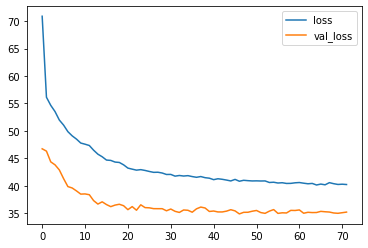

In [37]:
losses = pd.DataFrame(model_price.history.history)
losses.plot()

# Test and Evaluate the Model

In [38]:
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error

In [39]:
y_pred = model_price.predict(X_test).reshape(X_test.shape[0])

# Create a dataframe to put the two columns of the true value and the prediction
pred_df = pd.DataFrame({'Actual value':Y_test, 'Predicted value':y_pred})
print(pred_df.head(40))

    Actual value  Predicted value
0           85.0        66.617973
1           47.0        42.478973
2           43.0        42.277397
3           24.0        42.402832
4           30.0        42.402832
5           29.0        45.720329
6           38.0        44.279846
7           80.0        65.512459
8           65.0        42.345314
9           37.0        42.402832
10         160.0        63.941490
11         240.0        63.892529
12          16.0        42.402832
13         170.0       104.951241
14          55.0        68.667091
15          40.0        54.343193
16          46.0        42.283569
17          94.0        44.892963
18          85.0       100.406960
19         100.0        81.253181
20          26.5        48.799522
21         160.0        53.145279
22         120.0        67.944557
23          50.0        49.788643
24          50.0        42.273254
25          79.9        70.751511
26          85.0        63.079826
27          85.0        45.238449
28          95

In [40]:
mean_absolute_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])

35.2125838285504

In [44]:
print(mean_squared_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value']))

3547.1714961649327


In [42]:
from sklearn.metrics import explained_variance_score
explained_variance_score(Y_test, y_pred)

0.2206843758337801

In [43]:
pd.DataFrame(y_pred).to_csv('submission.csv')